In [33]:
import pandas as pd
import numpy as np

Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset (e.g., check data types, missing values, summary statistics).


In [34]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.


In [36]:
columns = df.columns
for col in columns:
  null_value = df[col].isnull().sum()
  print(f'{col}:{null_value}')

Pregnancies:0
Glucose:0
BloodPressure:0
SkinThickness:0
Insulin:0
BMI:0
DiabetesPedigreeFunction:0
Age:0
Outcome:0


In [37]:
df.duplicated().sum()

np.int64(0)

 3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.

In [38]:
# Separate features (X) and target (y)
X = df.drop(columns=['Outcome']).values
y = df['Outcome'].values
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
  np.random.seed(random_seed)
  indices = np.arange(X.shape[0])
  np.random.shuffle(indices)

  test_split_size = int(len(X) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]

  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]

  return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


4. Implement KNN:

• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).


• Compute distances using Euclidean distance.

In [39]:
def euclidean_distance(point1, point2):
  distance = np.sqrt(np.sum((point1 - point2) ** 2))
  return distance

• Write functions for:

– Predicting the class for a single query.

– Predicting classes for all test samples.


In [40]:
# Function for KNN prediction for a single query
def knn_predict_single(query, X_train, y_train, k=3):
  distances = [euclidean_distance(query, x) for x in X_train]
  sorted_indices = np.argsort(distances)
  nearest_indices = sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

In [41]:
# Function to test KNN for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
  predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
  return np.array(predictions)

• Evaluate the performance using accuracy.

In [42]:
# Function to compute accuracy of predictions
def compute_accuracy(y_true, y_pred):
  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  accuracy = (correct_predictions / total_predictions) * 100
  return accuracy

In [43]:
Outcomes=knn_predict(X_test, X_train, y_train, k=3)
Accurate=compute_accuracy(y_test, Outcomes)
print(f"Accuracy: {Accurate:.2f}%")

Accuracy: 67.39%


Problem - 2 - Experimentation:
1. Repeat the Classification Task:  
• Scale the Feature matrix X.  
• Use the scaled data for training and testing the kNN Classifier.  
• Record the results.


In [44]:
#Function to scale X train and X test
def scale_train_data(X_train,X_test):
  mean = np.mean(X_train, axis=0)
  std = np.std(X_train, axis=0)

  std[std == 0] = 1

  X_train_scaled = (X_train - mean) / std
  X_test_scaled = (X_test - mean) / std

  return X_train_scaled, X_test_scaled


In [46]:
x_train_scaled,x_test_scaled=scale_train_data(X_train,X_test)
Scaled_Prediction = knn_predict(x_test_scaled, x_train_scaled, y_train, k=3)
Scaled_Accuracy=compute_accuracy(y_test, Scaled_Prediction)
print(f"Accuracy: {Scaled_Accuracy:.2f}%")

Accuracy: 70.87%


2. Comparative Analysis:  
Compare the Results -  
• Compare the accuracy and performance of the kNN model on the original dataset Z from problem 1 versus the scaled dataset.  
• Discuss:  
– How scaling impacted the KNN performance.  
– The reason for any observed changes in accuracy.


In [47]:
print(f"\nOriginal data (k=3): {Accurate:.2f}%")
print(f"Scaled data (k=3): {Scaled_Accuracy:.2f}%")

if Scaled_Accuracy > Accurate:
  print("Scaling improved accuracy")
elif Scaled_Accuracy < Accurate:
  print("Scaling reduced accuracy")
else:
  print("No change in accuracy")

print("\nReason: kNN uses distance metrics.")
print("Scaling puts all features on same scale.")
print("This prevents large-value features from dominating.")


Original data (k=3): 67.39%
Scaled data (k=3): 70.87%
Scaling improved accuracy

Reason: kNN uses distance metrics.
Scaling puts all features on same scale.
This prevents large-value features from dominating.


Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:  
• Run the KNN model on both the original and scaled datasets for a range of:  
k= 1, 2, 3, . . . 15  
• For each k, record:  
– Accuracy.  
– Time taken to make predictions.


In [68]:
import time

k= range(1,16)

accuracy_original = {}
accuracy_scaled = {}
time_original = []
time_scaled = []

#For original data

for i in k:
  start_time = time.time()
  prediction_original = knn_predict(X_test, X_train, y_train, k=i)
  end_time = time.time()
  accuracy_original[i]=compute_accuracy(y_test, prediction_original)
  time_original.append(end_time - start_time)
  print("Original Data:")
  print(f"k={i}: {accuracy_original[i]:.2f}% ({time_original[i-1]:.4f}s)")

  x_train_scaled, x_test_scaled = scale_train_data(X_train, X_test)
  start_time = time.time()
  prediction_scaled = knn_predict(x_test_scaled, x_train_scaled, y_train, k=i)
  end_time = time.time()
  accuracy_scaled[i]=compute_accuracy(y_test, prediction_scaled)
  time_scaled.append(end_time - start_time)
  print("Scaled Data:")
  print(f"k={i}: {accuracy_scaled[i]:.2f}% ({time_scaled[i-1]:.4f}s)")

Original Data:
k=1: 68.70% (0.9025s)
Scaled Data:
k=1: 63.48% (0.8676s)
Original Data:
k=2: 72.61% (0.8862s)
Scaled Data:
k=2: 66.09% (0.9481s)
Original Data:
k=3: 67.39% (0.8697s)
Scaled Data:
k=3: 70.87% (1.0777s)
Original Data:
k=4: 72.17% (1.5612s)
Scaled Data:
k=4: 68.70% (1.5140s)
Original Data:
k=5: 68.70% (1.3439s)
Scaled Data:
k=5: 70.00% (0.8731s)
Original Data:
k=6: 70.00% (1.0975s)
Scaled Data:
k=6: 69.13% (0.8938s)
Original Data:
k=7: 69.13% (0.8954s)
Scaled Data:
k=7: 69.57% (0.8816s)
Original Data:
k=8: 71.30% (0.8852s)
Scaled Data:
k=8: 68.70% (0.8956s)
Original Data:
k=9: 70.00% (0.9149s)
Scaled Data:
k=9: 69.57% (0.8919s)
Original Data:
k=10: 71.74% (0.9042s)
Scaled Data:
k=10: 69.57% (1.1313s)
Original Data:
k=11: 73.04% (1.5860s)
Scaled Data:
k=11: 70.87% (1.4996s)
Original Data:
k=12: 73.91% (1.1574s)
Scaled Data:
k=12: 72.17% (0.8841s)
Original Data:
k=13: 74.35% (0.8960s)
Scaled Data:
k=13: 71.30% (0.9015s)
Original Data:
k=14: 72.61% (0.8845s)
Scaled Data:
k=14:

2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.


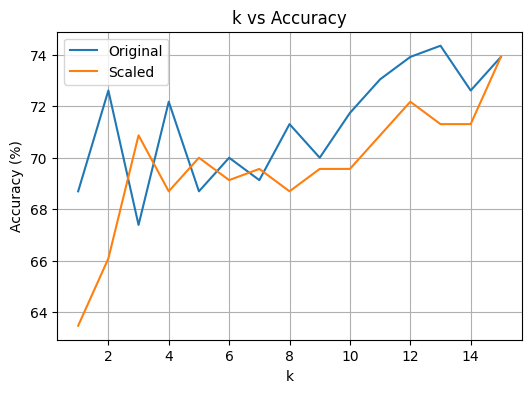

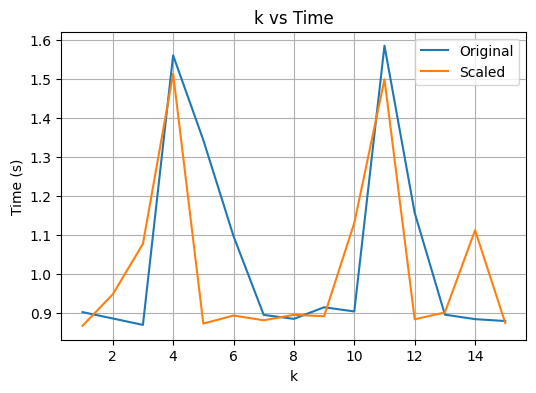

In [70]:
import matplotlib.pyplot as plt
# k vs Accuracy
plt.figure(figsize=(6, 4))
plt.plot(k, [accuracy_original[i] for i in k], label='Original')
plt.plot(k, [accuracy_scaled[i] for i in k], label='Scaled')
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.title('k vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# k vs Time
plt.figure(figsize=(6, 4))
plt.plot(k, [time_original[i-1] for i in k], label='Original')
plt.plot(k, [time_scaled[i-1] for i in k], label='Scaled')
plt.xlabel('k')
plt.ylabel('Time (s)')
plt.title('k vs Time')
plt.legend()
plt.grid(True)
plt.show()

3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.
